In [34]:
from rl.markov_decision_process import FiniteMarkovDecisionProcess
from rl.policy import FiniteDeterministicPolicy
from rl.distribution import Categorical, Choose
from typing import Mapping
import numpy as np
import matplotlib.pyplot as plt

In [55]:
N = 8

def all_other_lilies(i, N):
    for i in range(i):
        yield i, 0
    for j in range(i+1,N):
        yield j, 0
    yield N, 1

def construct_lily_mapping(N):
    mapping = {
        i: {
            'A': Categorical({(i-1, 0): i/N, (i+1, 1. if i+1 == N else 0.): (N-i)/N}),
            'B': Choose(all_other_lilies(i, N))
        }
        for i in range(1,N)
    }
    return mapping


lilypadMDP = FiniteMarkovDecisionProcess(construct_lily_mapping(N))

In [69]:
def construct_all_deterministic_policies(N: int):
    # a policy is equivalent to an N-bit binary number
    for policy in range(2**N):
        yield FiniteDeterministicPolicy({i: 'B' if ((1 << (i-1)) & policy) else 'A' for i in range(1,N)})

def compute_optimal_vf_and_policy(N: int):
    v_star = np.zeros(N-1)
    opt_policy = None
    mrp_v_star = None
    lilypadMDP = FiniteMarkovDecisionProcess(construct_lily_mapping(N))
    for n, policy in enumerate(construct_all_deterministic_policies(N)):
        mrp = lilypadMDP.apply_finite_policy(policy)
        v_star = np.maximum(v_star, mrp.get_value_function_vec(1))
        if np.equal(v_star, mrp.get_value_function_vec(1)).all():
            opt_policy, mrp_v_star = policy, mrp.get_value_function_vec(1)
    assert np.equal(v_star, mrp_v_star).all()
    return v_star, opt_policy

def print_optimal_info(N: int):
    v_star, opt_policy = compute_optimal_vf_and_policy(N)
    print("Optimal policy is:")
    print(opt_policy)
    print("with value function:")
    print(v_star)
    print(f"and probability of success = { np.mean(v_star) } assuming starting position is chosen uniformly at random among nonterminal lilypads.")

print_optimal_info(3)

Optimal policy is:
For State 1: Do Action B
For State 2: Do Action A

with value function:
[0.57142857 0.71428571]
and probability of success = 0.6428571428571429 assuming starting position is chosen uniformly at random among nonterminal lilypads.


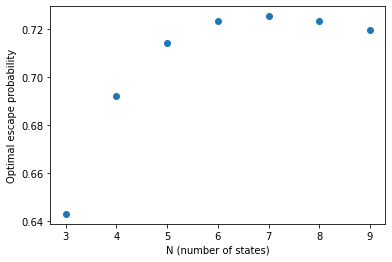

In [70]:
data = [np.mean(compute_optimal_vf_and_policy(i)[0]) for i in range(3,10)]
plt.scatter(np.arange(3,10), data)
plt.xlabel("N (number of states)")
plt.ylabel("Optimal escape probability")
plt.savefig("opt_esc_prob.png")
plt.show()